In [1]:
from create_map import *
from university_canton_mappings import *
import pandas as pd
import html5lib
import folium
import numpy as np
from datetime import datetime
import json

# Exercise 1

The sole purpose of this exercise is not only to calculate the total amount of grants alotted to different Swiss cantons but it is about creating a visualization that shows those differences in an interactive way through the use of choropleth maps.

### Step 1: Extraction of Data from Grants csv file

We work with P3 database of the SNSF (Swiss National Science Foundation) to extract grant information. The csv file that conveys in particular our purpose is P3_GrantExport.csv which we downloaded and put under Data directory.  

Our strategy in this part consists of the following:
1. Data Extraction: after familiarization with schema, we keep only useful columns
2. Data Cleaning: removal of rows for which the university/ totalAmount are not provided  
3. Data Pre-Processing: convertion of totalAmounts to float type so that the aggregation by the sum of total amounts per each university works

#### Step 1.1. Data Extraction:

We start by loading the data and looking at the first 5 rows.  

In [2]:
original_grants = pd.read_csv('Data/P3_GrantExport.csv',sep=";")
original_grants.head()

,"﻿""Project Number""",Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,Start Date,End Date,Approved Amount,Keywords
0,1,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,Nicht zuteilbar - NA,10302,Swiss history,Human and Social Sciences;Theology & religious...,01.10.1975,30.09.1976,11619.00,NaN
1,4,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Université de Genève - GE,10104,Educational science and Pedagogy,"Human and Social Sciences;Psychology, educatio...",01.10.1975,30.09.1976,41022.00,NaN
2,5,"Kritische Erstausgabe der ""Evidentiae contra D...",NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,"NPO (Biblioth., Museen, Verwalt.) - NPO",10101,Philosophy,Human and Social Sciences;Linguistics and lite...,01.03.1976,28.02.1985,79732.00,NaN
3,6,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Universität Basel - BS,10302,Swiss history,Human and Social Sciences;Theology & religious...,01.10.1975,30.09.1976,52627.00,NaN
4,7,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,"NPO (Biblioth., Museen, Verwalt.) - NPO",10303,Ancient history and Classical studies,Human and Social Sciences;Theology & religious...,01.01.1976,30.04.1978,120042.00,NaN


We keep only two columns: University and Approved Amount

In [3]:
amount_university_grants = original_grants[["University","Approved Amount"]]

#### Step 1.2. Data Cleaning:

In [4]:
amount_university_grants["Approved Amount"].describe()

count                       63969
unique                      36455
top       data not included in P3
freq                        10910
Name: Approved Amount, dtype: object

In [5]:
len(amount_university_grants[amount_university_grants["Approved Amount"]=='data not included in P3'])

10910

For 10910 rows, the approved amount is not included and have a value of 'data not included in P3'. We decided to remove those. 

In [6]:
grants_without_nan = amount_university_grants[amount_university_grants["Approved Amount"]!='data not included in P3']

In [7]:
grants_without_nan.describe()

,University,Approved Amount
count,50878,53059
unique,77,36454
top,Universität Zürich - ZH,10000.00
freq,6754,611


#### 3. Data Pre-Processing:

In [8]:
grants_without_nan["Approved Amount"].dtype

dtype('O')

Since the type of this column is object, we convert it into numeric values.

In [9]:
grants_without_nan["Approved Amount"] = pd.to_numeric(grants_without_nan["Approved Amount"],errors='coerce')
grants_without_nan

,University,Approved Amount
0,Nicht zuteilbar - NA,11619.0
1,Université de Genève - GE,41022.0
2,"NPO (Biblioth., Museen, Verwalt.) - NPO",79732.0
3,Universität Basel - BS,52627.0
4,"NPO (Biblioth., Museen, Verwalt.) - NPO",120042.0
5,Université de Fribourg - FR,53009.0
6,Université de Fribourg - FR,25403.0
7,Universität Zürich - ZH,47100.0
8,Université de Lausanne - LA,25814.0
9,Université de Genève - GE,360000.0


In [10]:
grants_without_nan.dtypes

University          object
Approved Amount    float64
dtype: object

We aggregate the dataframe by calculating the sum of approved amount per each university.

In [11]:
df = grants_without_nan.groupby(["University"])["Approved Amount"].sum().reset_index()

In [12]:
grants_without_nan.dtypes

University          object
Approved Amount    float64
dtype: object

We convert it into a dataframe

In [13]:
university_amount_df = pd.DataFrame(df)

#### Data Description Summary:

In [14]:
percentage_rows = round(len(grants_without_nan)/len(original_grants),2)*100
print('Number of rows after filtering data: ' +str(len(grants_without_nan))+'\n'+
      'Ratio of kept rows after filtering the data: '+str(percentage_rows)+'%'+'\n'+
      'Number of universities:'+str(len(university_amount_df)))

Number of rows after filtering data: 53059
Ratio of kept rows after filtering the data: 83.0%
Number of universities:77


### Step 2: Mapping University names to cantons

Now that we have compiled the list of universities, we move to the next step which is mapping universities to cantons which is accomplished in two steps:
1. Automatic Mapping: we have tried different APIs including geomaps, google maps. But at the end, we opted for google maps api thanks to its efficiency and its exhaustivity of the returned results. We also played a little bit with the universities names to maximize the coverage: we compare the performance using first part of the university name versus its abbreviation. We got better results by splitting the university name and taking only the first part without the abbreviation.  We have also tried goslate and other translation apis to translate to english but it didn't increase the performance of the coverage so much. At the end, the best coverage we got is 35 out of 77 universities which is roughly half coverage. 
2. Manual Mapping: for those universities for which we couldn't get a mapping automatically, we looked them up manually and we compiled this list in a separate file called manual_mappings under Data directory. 

#### Step 2.1: Mapping using GoogleMaps API

We add the component 'components=country:ch' to force the api to look only in Switzerland

#### Remark:

For safety reasons, we don't include the key we used. If you want to try it, please use your own key by assigning a value to key.

In [15]:
key =  #put your key here
google_url = 'https://maps.googleapis.com/maps/api/geocode/json?components=country:ch&key='+key
canton_mappings=[]
for index, row in university_amount_df.iterrows():
    university = row['University'].split('-')[0]
    canton=get_canton_id(google_url,university)
    canton_mappings.append(canton)

In [16]:
university_amount_df['Canton'] = canton_mappings

#### Summary of automatic mapping

In [17]:
canton_mappings

['',
 '',
 '',
 'TG',
 '',
 'VD',
 'ZH',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'TI',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'NE',
 'VD',
 '',
 'LU',
 '',
 '',
 '',
 '',
 'ZG',
 'GR',
 'TI',
 'ZH',
 '',
 'SG',
 '',
 '',
 'AG',
 '',
 '',
 'BE',
 'GR',
 'LU',
 '',
 'SH',
 'SZ',
 'SG',
 'TG',
 'VS',
 'ZG',
 'ZH',
 'ZH',
 '',
 'SG',
 '',
 '',
 '',
 'BS',
 '',
 '',
 '',
 'BS',
 'BE',
 'LU',
 'SG',
 'ZH',
 'FR',
 'GE',
 'VD',
 '',
 '',
 '',
 '']

In [18]:
university_mapped = university_amount_df[university_amount_df['Canton']!='']
university_total = university_amount_df
print('Total Number of universities:'+str(len(canton_mappings))+'\n'+
      'Total Percentage of universities for which canton was found:'+str(len(university_mapped)/len(university_total)))

Total Number of universities:77
Total Percentage of universities for which canton was found:0.44155844155844154


### Step 3: Manual Mappings

In [19]:
# Reading manual mapping data from file and storing them in a dataframe
manual_mapping_df = pd.read_csv('Data/manualMapping.txt',header=None)
manual_mapping_df.columns = ['University','Canton']
manual_mapping_df
# Assigning cantons to university by adding a new column in university amount dataframe
for i in range(0,len(manual_mapping_df)):
    university_amount_df['Canton'][university_amount_df['University']==manual_mapping_df['University'][i]]=manual_mapping_df['Canton'][i]

In [20]:
# Displaying the whole entries of universities
university_amount_df

,University,Approved Amount,Canton
0,AO Research Institute - AORI,3.435621e+06,
1,Allergie- und Asthmaforschung - SIAF,1.916996e+07,GR
2,Berner Fachhochschule - BFH,3.102870e+07,BE
3,Biotechnologie Institut Thurgau - BITG,2.492535e+06,TG
4,Centre de rech. sur l'environnement alpin - CR...,1.567678e+06,VS
5,EPF Lausanne - EPFL,1.175316e+09,VD
6,ETH Zürich - ETHZ,1.635597e+09,ZH
7,Eidg. Anstalt für Wasserversorgung - EAWAG,7.461922e+07,ZH
8,"Eidg. Forschungsanstalt für Wald,Schnee,Land -...",4.836039e+07,
9,Eidg. Hochschulinstitut für Berufsbildung - EHB,2.086572e+06,BE


### Step 4:  Final Preparation of Mappings

#### Step 4.1: Filtering Out and Testing for University/Amount coverage

In [21]:
# Display the entries of universities for which we get empty results of cantons
university_amount_df_nan = university_amount_df[university_amount_df['Canton']=='']
university_amount_df_nan

,University,Approved Amount,Canton
0,AO Research Institute - AORI,3.435621e+06,
8,"Eidg. Forschungsanstalt für Wald,Schnee,Land -...",4.836039e+07,
10,Eidg. Material und Prüfungsanstalt - EMPA,5.857452e+07,
17,Firmen/Privatwirtschaft - FP,1.116867e+08,
37,Istituto Svizzero di Roma - ISR,1.410000e+05,
39,"NPO (Biblioth., Museen, Verwalt.) - NPO",3.341306e+08,
40,Nicht zuteilbar - NA,1.424257e+08,
74,Weitere Institute - FINST,9.256736e+06,
75,Weitere Spitäler - ASPIT,1.074981e+07,


In [22]:
university_amount_df_nan.describe()

,Approved Amount
count,9.000000e+00
mean,7.986234e+07
std,1.078095e+08
min,1.410000e+05
25%,9.256736e+06
50%,4.836039e+07
75%,1.116867e+08
max,3.341306e+08


There are three categories of universities for which we didn't succeed to find a mapping:
1. Universities provided under the name of "Other Universities" as translated from german:
   	'Weitere Institute - FINST' and 'Weitere Spitäler - ASPIT', '	NPO (Biblioth., Museen, Verwalt.) - NPO'
2. No assignable values: 'Nicht zuteilbar - NA'
3. Universities not in Switzerland: '7 Istituto Svizzero di Roma - ISR' which is in Roma,    Italy
4. Universities we found in multiple cantons: 'Eidg. Forschungsanstalt für Wald,Schnee,Land - WSL' and 'Eidg. Material und Prüfungsanstalt - EMPA'
5. Private Companies: 'Firmen/Privatwirtschaft - FP'

In [23]:
# Dropping Italian University
swiss_university_amount_df = university_amount_df[university_amount_df['University']!="Istituto Svizzero di Roma - ISR"]
# Dropping Private Companies
swiss_university_amount_df = swiss_university_amount_df[swiss_university_amount_df['University']!="Firmen/Privatwirtschaft - FP"]
swiss_university_amount_df.reset_index(drop=True)

,University,Approved Amount,Canton
0,AO Research Institute - AORI,3.435621e+06,
1,Allergie- und Asthmaforschung - SIAF,1.916996e+07,GR
2,Berner Fachhochschule - BFH,3.102870e+07,BE
3,Biotechnologie Institut Thurgau - BITG,2.492535e+06,TG
4,Centre de rech. sur l'environnement alpin - CR...,1.567678e+06,VS
5,EPF Lausanne - EPFL,1.175316e+09,VD
6,ETH Zürich - ETHZ,1.635597e+09,ZH
7,Eidg. Anstalt für Wasserversorgung - EAWAG,7.461922e+07,ZH
8,"Eidg. Forschungsanstalt für Wald,Schnee,Land -...",4.836039e+07,
9,Eidg. Hochschulinstitut für Berufsbildung - EHB,2.086572e+06,BE


In [24]:
sum_all_df = swiss_university_amount_df['Approved Amount'].sum()
sum_nan_df = swiss_university_amount_df[swiss_university_amount_df["Canton"]=='']['Approved Amount'].sum()
percent = sum_nan_df/sum_all_df 
percent

0.04717327975427479

The percentage of amounts not covered is 4.69%, so it is safe to say that we have covered top 95% Swiss universities.

In [25]:
university_amount_df = university_amount_df[university_amount_df["Canton"]!='']
# Here is our final list after deleting null entries
university_amount_df

,University,Approved Amount,Canton
1,Allergie- und Asthmaforschung - SIAF,1.916996e+07,GR
2,Berner Fachhochschule - BFH,3.102870e+07,BE
3,Biotechnologie Institut Thurgau - BITG,2.492535e+06,TG
4,Centre de rech. sur l'environnement alpin - CR...,1.567678e+06,VS
5,EPF Lausanne - EPFL,1.175316e+09,VD
6,ETH Zürich - ETHZ,1.635597e+09,ZH
7,Eidg. Anstalt für Wasserversorgung - EAWAG,7.461922e+07,ZH
9,Eidg. Hochschulinstitut für Berufsbildung - EHB,2.086572e+06,BE
11,Ente Ospedaliero Cantonale - EOC,5.067172e+06,TI
12,Fachhochschule Kalaidos - FHKD,1.090280e+06,ZH


#### Step 4.2: Total Amount per canton Mappings Final Stage

Now, we aggregate using groupby to get the sum of the amounts for each canton.

In [26]:
df = university_amount_df.groupby(["Canton"])["Approved Amount"].sum().reset_index()

In [27]:
canton_amount_df = pd.DataFrame(df)
canton_amount_df

,Canton,Approved Amount
0,AG,1.261875e+08
1,BE,1.554479e+09
2,BS,1.392498e+09
3,FR,4.590737e+08
4,GE,1.877102e+09
5,GR,3.310270e+07
6,JU,3.416297e+07
7,LU,5.477329e+07
8,NE,4.025250e+08
9,SG,9.119410e+07


#### Step 4.3: Getting the cantons from json file and assigning 0 to cantons to which no university in our database maps to

In [28]:
# Do not forget to explain the format of the json
cantons_mappings_dict = get_cantons_json('json/ch-cantons.topojson.json')
cantons_mappings_dict.values()

dict_values(['ZG', 'BL', 'SH', 'GE', 'UR', 'NE', 'GL', 'ZH', 'SG', 'JU', 'TI', 'SO', 'BE', 'LU', 'NW', 'BS', 'OW', 'TG', 'VD', 'VS', 'AG', 'AI', 'FR', 'AR', 'SZ', 'GR'])

In [29]:
existing_cantons = canton_amount_df['Canton'].values
for canton_id in cantons_mappings_dict.values():
    if (canton_id not in existing_cantons):
        canton_amount_df.loc[len(canton_amount_df)]=[canton_id,0]
        
canton_amount_df

,Canton,Approved Amount
0,AG,1.261875e+08
1,BE,1.554479e+09
2,BS,1.392498e+09
3,FR,4.590737e+08
4,GE,1.877102e+09
5,GR,3.310270e+07
6,JU,3.416297e+07
7,LU,5.477329e+07
8,NE,4.025250e+08
9,SG,9.119410e+07


### Step 5: Binding of data between Pandas DataFrame and Geo/TopoJSON geometries and Creation of Choropleth Map

#### Step 5.1: Choice of the color threshold 

In the table below we sorted the cantons based on the Approved Amount from the lowest to the highest and then we computed the cummulative sum of the ammount( we divided by 1000,000 to make the numbers readable) and then we computed the difference between the cummulative sum as 'Delta' and we decided to choose 6 colors to represent different ranges of the Approved Amount for the cantons to not overload the person looking at this map. 

In [30]:
amounts_df =canton_amount_df.sort('Approved Amount')
amounts_df.reset_index()
amounts_df['cum_sum'] = amounts_df['Approved Amount'].cumsum()
amounts_df['cum_sum_smallnumber']= amounts_df['cum_sum']/1000000
amounts_df['Delta']=(amounts_df['cum_sum_smallnumber'] - amounts_df['cum_sum_smallnumber'].shift(1))
amounts_df

,Canton,Approved Amount,cum_sum,cum_sum_smallnumber,Delta
25,AR,0.000000e+00,0.000000e+00,0.000000,NaN
23,OW,0.000000e+00,0.000000e+00,0.000000,0.000000
22,NW,0.000000e+00,0.000000e+00,0.000000,0.000000
21,GL,0.000000e+00,0.000000e+00,0.000000,0.000000
20,UR,0.000000e+00,0.000000e+00,0.000000,0.000000
19,BL,0.000000e+00,0.000000e+00,0.000000,0.000000
24,AI,0.000000e+00,0.000000e+00,0.000000,0.000000
10,SH,1.766910e+05,1.766910e+05,0.176691,0.176691
12,SZ,9.365510e+05,1.113242e+06,1.113242,0.936551
17,ZG,2.473055e+06,3.586297e+06,3.586297,2.473055


To assign colors based on the Approved Amount, we looked at Delta column and came up with the following categories in such a way that they capture the true threshold differences in the data: 
* Color 1: Cantons with Approved Amount=0 
* Color 2: Cantons with Approved Amount <= 4.025250e+08
* Color 3: Cantons with Approved Amount <= 4.590737e+08
* Color 4: Cantons with Approved Amount <= 1.554479e+09
* Color 5: Cantons with Approved Amount <= 2.413239e+09
* Color 6: Cantons with Approved Amount <= 3.627465e+09

#### Step 5.2: Drawing the choropleth map

Finally, we create our choropleth map using the function create_choropleth_map. Please refer to create_map.py python file for details of implementation of this function and further documentation.

### Remark: Please look at swiss_map.html in html folder to see the rendered choropleth map !!

In [31]:
swiss_map = create_choropleth_map(canton_amount_df)
swiss_map.save('html/swiss_map.html')
swiss_map

### How to Read the Graph Colors: 

To assign colors based on the Approved Amount, we give light green color to cantons that did not receive approved amount and dark green color to cantons that received a high approved amount. and some cantons are in between.

# Bonus Part

The goal of this part is to give a rough estimate of the grants repartition over the Röstigraben regions:
* German Region
* French Region
* Italian Region
* Romansh Region

The main regions that are relevant in the context of this exercise are German, French and Italian because there is no university that belongs to the Romansh region in the P3 database, as we will see later.

### Strategy for solving the problem

Using the dataframe that groups total amounts of grants by canton, it is clear that in order to calculate the total amounts of grants by region we need to map the cantons to their corresponding regions. The following points summarize our strategy: 

1. Web Scrapping of cantons to regions mapping information from wikipedia  
2. Assignment of universities to regions: here, we are faced with two main categories of cantons:
    * One to one mapping: Cantons that belong to only one region => those are  the least problematic category.
    * One to many mapping: Cantons that belong to more than one region: 
        * BE: German, French
        * FR: French, German
        * GR: German, Romansh, Italian
        * VS: French, German

### Step 1: Scaping of cantons to Röstigraben regions from Wikipedia  

We got Canton-Language table directly from wikipedia by parsing the html source code in canton_language.html file that can be found under html folder. 

In [32]:
# Getting the html table and storing it in a dataframe 
table = pd.read_html('html/canton_language.html', header=0)[1][['Code','Official languages']]
# Sorting the dataframe alphabetically by Canton Code
table = table[:-1].sort_values('Code').reset_index(drop=True)
# Displaying the cantons to official languages mappings
table

,Code,Official languages
0,AG,German
1,AI,German
2,AR,German
3,BE,"German, French"
4,BL,German
5,BS,German
6,FR,"French, German"
7,GE,French
8,GL,German
9,GR,"German, Romansh, Italian"


### Step 2: Dealing with Problematic Cantons

#### Distinguishing cantons with only one languages from the ones with more than one language

* Finding cantons with only one language, thus belonging to only one region

In [33]:
# Cantons with only one language
cantons_one_lang = []
for i in range(0,len(table)):
    if len(table['Official languages'].iloc[i].split(',')) == 1: # the languages are included separated by comma
        cantons_one_lang.append(table.iloc[i]['Code'])
cantons_one_lang

['AG',
 'AI',
 'AR',
 'BL',
 'BS',
 'GE',
 'GL',
 'JU',
 'LU',
 'NE',
 'NW',
 'OW',
 'SG',
 'SH',
 'SO',
 'SZ',
 'TG',
 'TI',
 'UR',
 'VD',
 'ZG',
 'ZH']

* Finding cantons with more than one language, thus belonging to more than one region => problematic cantons

In [34]:
# Cantons with more than one language
cantons_more_lang = []
for i in range(0,len(table)):
    if len(table['Official languages'].iloc[i].split(',')) > 1: # the languages are included separated by comma
        cantons_more_lang.append(table.iloc[i]['Code'])
cantons_more_lang

['BE', 'FR', 'GR', 'VS']

Let's look at the universities for which the canton is problematic:

In [35]:
# Getting the universities where the canton belongs to many regions
university_amount_more_lang = university_amount_df[university_amount_df['Canton'].isin(cantons_more_lang)]
# Sorting the universities by canton values 
university_amount_more_lang = university_amount_more_lang.sort_values(['Canton'], ascending=[0])
# Giving a hierarchical index based on Canton and University for better readability
university_amount_more_lang = university_amount_more_lang.set_index(['Canton','University'])
university_amount_more_lang 

Approved Amount
Canton University                                                         
VS     Centre de rech. sur l'environnement alpin - CREALP     1.567678e+06
       Fernfachhochschule Schweiz (Mitglied SUPSI) - FFHS     1.200000e+04
       Forschungsinstitut für Opthalmologie - IRO             3.478469e+06
       Idiap Research Institute - IDIAP                       2.218311e+07
       Pädagogische Hochschule Wallis - PHVS                  4.254980e+05
GR     Allergie- und Asthmaforschung - SIAF                   1.916996e+07
       Institut für Kulturforschung Graubünden - IKG          1.219681e+06
       Physikal.-Meteorolog. Observatorium Davos - PMOD       1.209844e+07
       Pädagogische Hochschule Graubünden - PHGR              6.146130e+05
FR     Haute école pédagogique fribourgeoise - HEPFR          1.547498e+06
       Université de Fribourg - FR                            4.575262e+08
BE     Berner Fachhochschule - BFH                            3.102870e+07
       Eidg. Hochschulinstitut für Berufsbildung - EHB        2.086572e+06
       Pädagogische Hochschule Bern - PHBern                  1.990390e+06
       Universität Bern - BE                                  1.519373e+09

In [36]:
len(university_amount_more_lang)

15

#### Explanation of Choice of the Approach:

Since the number is not too high, we decided to go for a manual approach to get a better precision of our estimate. Otherwise, it is really hard to design an approach that could fit a precise and accurate prediction of the language of each university, provided the following reasons:
* We cannot rely on the language of the text name of the university, since most of the universities in this database are provided in German or English and this also applies to universities at the French side. So the choice of the language is a NOT predictive feature.
* It is hard to rely on the boundaries between the regions. Some of the universities are exactly on the boundary and we couldn't get a Röstigraben json map.  

After doing manual inspection on the 15 universities with problematic cantons [Bern, GR, Valais, Fribourg], we have concluded that for:
* FR: total amount of grants can be divived into two with %50 %50 ratios. It has two universities and they both teach both of the languages (French and German). Also, geographically, they are on the border of language seperation => 50% German, 50% French 
* BE: Universities at Bern are mostly located in Bern's center which is inside German part => so we assign universities belonging to Bern to German side
* GR: Almost all universities there belong to German side => so we assign universities belonging to GR to German side
* VS: Schools that share the huge majority of the resources belong to French side => so  we assign universities belonging to VS to French 

To handle Fribourg's extreme case, we first assign it to French. Then, we assign 50

In [37]:
table.loc[3]['Official languages'] = 'German' #Bern
table.loc[9]['Official languages'] = 'German' #GR
table.loc[6]['Official languages'] = 'French' #Fribourg
table.loc[23]['Official languages'] = 'French' #Valais

fribourg_amount = int(canton_amount_df.loc[6]['Approved Amount'])

merged = pd.merge(canton_amount_df, table, right_on='Code', left_on='Canton')[['Approved Amount', 'Official languages']]

cantons_amount = merged.groupby(['Official languages']).sum().reset_index()


cantons_amount.set_value(0, 'Approved Amount', cantons_amount.loc[0]['Approved Amount'] - (fribourg_amount*0.5))
cantons_amount.set_value(1, 'Approved Amount', cantons_amount.loc[1]['Approved Amount'] + (fribourg_amount*0.5))
cantons_amount = cantons_amount.set_value(4, 'Official languages', 'Rumantsch')
cantons_amount = cantons_amount.set_value(4, 'Approved Amount', 0)

### Step 3: Plotting the Pie chart distribution of

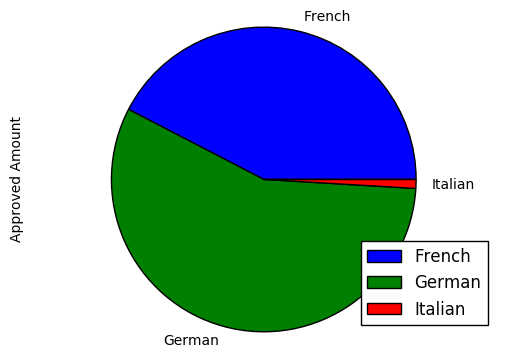

In [38]:
%matplotlib inline

plot = cantons_amount.set_index('Official languages').plot.pie(y='Approved Amount', x='Official languages')
plot.legend(loc='lower right')
plot.axis('equal')
plot

From the above pie, it is obvious how German region has more allocated amounts than French. While Italian region doesn't enjoy much compared to the two other regions.

To have an even better understanding of the disparities between the region, we describe using basic statistics.

In [39]:
cantons_amount.groupby('Official languages').describe()

Approved Amount
Official languages                       
French             count     1.000000e+00
                   mean      5.196688e+09
                   std                NaN
                   min       5.196688e+09
                   25%       5.196688e+09
                   50%       5.196688e+09
                   75%       5.196688e+09
                   max       5.196688e+09
German             count     1.000000e+00
                   mean      6.947158e+09
                   std                NaN
                   min       6.947158e+09
                   25%       6.947158e+09
                   50%       6.947158e+09
                   75%       6.947158e+09
                   max       6.947158e+09
Italian            count     1.000000e+00
                   mean      1.152623e+08
                   std                NaN
                   min       1.152623e+08
                   25%       1.152623e+08
                   50%       1.152623e+08
                   75%       1.152623e+08
                   max       1.152623e+08
Rumantsch          count     1.000000e+00
                   mean      0.000000e+00
                   std                NaN
                   min       0.000000e+00
                   25%       0.000000e+00
                   50%       0.000000e+00
                   75%       0.000000e+00
                   max       0.000000e+00

Here are the total approved amounts of the different regions:

In [40]:
cantons_amount.sort_values(['Approved Amount'], ascending=[0])

,Official languages,Approved Amount
1,German,6.947158e+09
0,French,5.196688e+09
2,Italian,1.152623e+08
4,Rumantsch,0.000000e+00


#### Summary:

In [41]:
# Storing the total amounts respective to each region 
amount_german = cantons_amount[cantons_amount['Official languages']=='German'].iloc[0]['Approved Amount']
amount_french = cantons_amount[cantons_amount['Official languages']=='French'].iloc[0]['Approved Amount']
amount_italian = cantons_amount[cantons_amount['Official languages']=='Italian'].iloc[0]['Approved Amount']

# Calculate the differences between the amounts in the three different regions
difference_german_french = amount_german - amount_french
difference_french_italian = amount_french - amount_italian

# Calculate the percentages of the amounts in the three different regions
perce_german_french = round(((amount_german - amount_french)/amount_german)*100,2) 
perce_french_italian = round(((amount_french - amount_italian)/amount_french)*100,2)

# Print little summary
print('Amount Difference between German and French:'+str(difference_german_french)+'\n\n'+
      'Percentage of the difference between German and French:'+str(perce_german_french)+'%\n\n'+
      'Amount Difference between French and Italian:'+str(difference_french_italian)+'\n\n'+
      'Percentage of the difference Percentage between French and Italian:'+str(perce_french_italian)+'%')

Amount Difference between German and French:1750470602.36

Percentage of the difference between German and French:25.2%

Amount Difference between French and Italian:5081425270.36

Percentage of the difference Percentage between French and Italian:97.78%


Based on this approach, we can say that universities on the German Side receive 25.2% more amount of grants than French side. While, Italian receive less than 97,78% of amount granted  to the Italian side. 